In [265]:
import os
from PIL import Image, __version__
from matplotlib import image, pyplot, colors
from plotnine import *
import numpy as np
import pandas as pd

In [3]:
print('Pillow Version:', __version__)

Pillow Version: 7.1.2


In [4]:
# sort out directory
os.chdir("/Users/mac/Documents/Projects/computer_vision/")
os.getcwd()

'/Users/mac/Documents/Projects/computer_vision'

# Question 1a
* load PNG file as numpy array

In [387]:
rocketman=Image.open('2_2D_spatial_cross_correlation/data/wallypuzzle_rocket_man.png')
print(rocketman.format, rocketman.size, rocketman.mode)

PNG (111, 123) RGBA


In [388]:
# show image - it appears as  seperate pop-up
#rocketman.show()

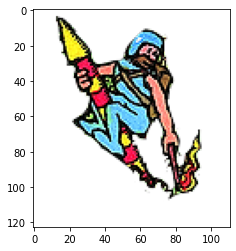

In [389]:
# display the the image of rocket man using matplotlib
pyplot.imshow(rocketman)
pyplot.show()

In [395]:
# convert to numpy array
rocketman_array=np.asarray(rocketman)

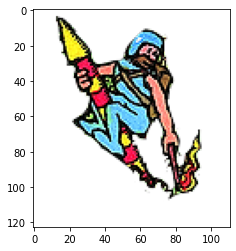

In [10]:
# convert to numpy array back to rocketman
rocketman_array_back_to_image=Image.fromarray(rocketman_array)
pyplot.imshow(rocketman_array_back_to_image) 
pyplot.show()

# Question 1b
* Write a function which turns a 3 x 2D (RGB) image into greyscale.

I also just mess around with images here.

In [11]:
# change rocketman into black & white
rocketman_bw=rocketman.convert('LA')

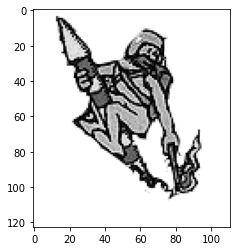

In [12]:
pyplot.imshow(rocketman_bw) # display the array of pixels as an image
pyplot.show()

In [13]:
# is there a difference in the colour range of black and white and RGB?
np.asarray(rocketman_bw).min()


0

In [14]:
np.asarray(rocketman_bw).max()

255

In [15]:
# this is the shape of the above - 
# this means the y-axis ranges from 0-123, and the x-axis ranges from 0-111. This is reflected in the axis values
print(f'{rocketman_array.shape} a hundred and twenty three 111 x 4 arrays')

(123, 111, 4) a hundred and twenty three 111 x 4 arrays


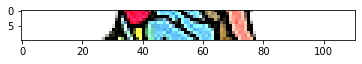

In [440]:
# let's show a slice of rocket man
rocketman_array_row_slice=rocketman_array[50:60,:,0:4]     # take slice from tensor/matrix/array thing
rocketman_row_slice=Image.fromarray(rocketman_array_row_slice) # convert numpy array to image
pyplot.imshow(rocketman_row_slice) 
pyplot.show()

In [446]:
pyplot.imsave('rocketman_slice.pdf', rocketman_array_row_slice)

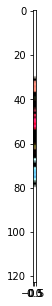

In [17]:
# column slice 1 pxl wide
rocketman_array_col_slice=rocketman_array[:,40:41,0:4]
rocketman_col_slice=Image.fromarray(rocketman_array_col_slice) # convert numpy array to image
pyplot.figure(figsize = (10,5))
pyplot.imshow(rocketman_col_slice) 
pyplot.show()

In [18]:
# let's make rocketman transparent - this means multiplying the 'A' in RGBA by 0.1 to make the image transparent.
# Here's an brute force way:
rocketman_array_trans=np.empty_like(rocketman_array)                    # create a tensor the same size as original
for i in range(rocketman_array.shape[0]):
    for j in range(rocketman_array.shape[1]):
        rocketman_array_trans[i,j,:]=rocketman_array[i,j,:]*np.array([1,1,1,0.1]) # scale last element (alpha) in RGBA array

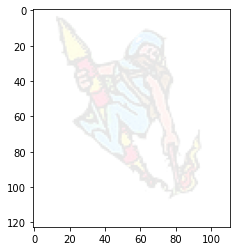

In [19]:
rocketman_trans=Image.fromarray(rocketman_array_trans) # convert tensor to image
pyplot.imshow(rocketman_trans) 
pyplot.show()

In [20]:
# let's try making rocket man transparent using matrix multiplication.
# I have 123 111x4 matricies to multiply by a 4x1 scaling matrix:

rocketman_array_trans2=rocketman_array*np.array([1,1,1,0.5])

In [21]:
# notice the multiplication has changed the dtype in the array
rocketman_array.dtype

dtype('uint8')

In [22]:
rocketman_array_trans2.dtype

dtype('float64')

In [23]:
# I need to change to uint8 datatype
rocketman_array_trans2=rocketman_array_trans2.astype(np.uint8)

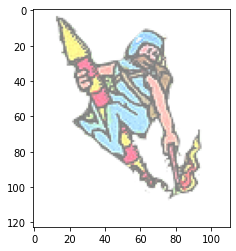

In [24]:
# now I can plot the transparent image
rocketman_trans2=Image.fromarray(rocketman_array_trans2) # convert tensor to image
pyplot.imshow(rocketman_trans2) 
pyplot.show()


In [25]:
# permissions on the array becasue I'm going to make some changes.
rocketman_array.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

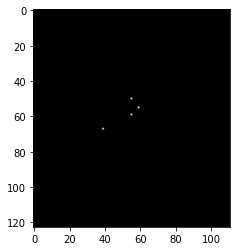

In [26]:
# Let's see if I can get one type of pixel, e.g. this blue colour (RGBA=[156, 255, 255, 255])
mask=rocketman_array.copy() # I create a copy because I need to modify the image, and to do that I need write permission 
                            # (note this is may not be a copy of the image, but instead a copy of the pointers - which isn't important here, but good to know)
indices_lst_notblue = np.where(np.any(mask != [156, 255, 255, 255], axis=-1)) # get any pixel that is NOT blue pixels
indices_lst_blue = np.where(np.all(mask == [156, 255, 255, 255], axis=-1))    # this is just an example showing how to get blue pixels
mask[indices_lst_notblue]=[0,0,0,255] # colour all not blue pixels, black
pyplot.imshow(mask)                   # show results
pyplot.show()

In [447]:
pyplot.imsave('blue_pixels_in_maze.pdf', mask)

In [ ]:
# now the rocketman has transparent pixels around him, so let's find them and colour them black
mask2=rocketman_array.copy() # I create a copy because I need to modify the image, and to do that I need write permission
indices_lst_trans = np.all(mask[3] == 255,) # get any pixel that is NOT blue pixels
mask[indices_lst_notblue]=[0,0,0,255] # colour all not blue pixels, black
pyplot.imshow(mask)                   # show results
pyplot.show()


In [36]:
mask2=rocketman_array.copy()
indices_lst_solid=rocketman_array[:,:,3]==255 # all pixels with no transparency


In [41]:
# how many pixels are solid
indices_lst_solid.sum()

3401

In [42]:
# how many pixels have some transparency
(~indices_lst_solid).sum()

10252

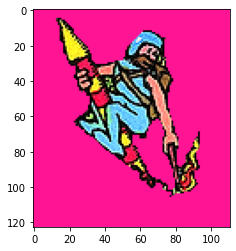

In [46]:
mask2[~(indices_lst_solid)]=[255,20,147,255] # colour all non-transparent pixels, fluro pink
pyplot.imshow(mask2)                         # show results
pyplot.show()

# useful reference: https://stackoverflow.com/questions/52735231/how-to-select-all-non-black-pixels-in-a-numpy-array/52737768

In [449]:
pyplot.imsave('rocketman_hotpink.pdf', mask2)

# Colour distribution

## Puzzle image

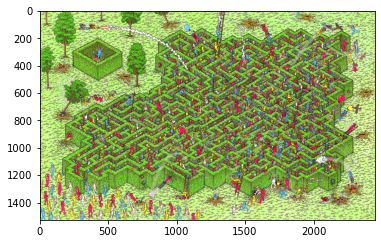

In [348]:
puzzle=Image.open('2_2D_spatial_cross_correlation/data/wallypuzzle.png')
pyplot.imshow(puzzle)
pyplot.show()

In [50]:
puzzle_array=np.asarray(puzzle)

In [420]:
puzzle_array.shape

(1526, 2446, 4)

In [374]:
# create dataframe so I can plot the colour frequency
R=puzzle_array[:,:,0][0].astype('int')
G=puzzle_array[:,:,1][0].astype('int')
B=puzzle_array[:,:,2][0].astype('int')
Count=1
colours_df=pd.DataFrame({'R':R,'G':G,'B':B,'Count':Count})

In [376]:
# aggregate
colours_agg=colours_df.groupby(['R','G','B'])['Count'].sum().reset_index()

In [377]:
# convert rgb to hex (function)
def rgbToHex(df):
    r,g,b=(df.R,df.G,df.B)
    return '#%02x%02x%02x' % (r,g,b)

In [378]:
# apply colour conversion function
colours_agg['hex']=colours_agg.apply(rgbToHex, axis =1)

In [351]:
# inspect handiwork
colours_agg.head(3)

,R,G,B,Count,RGB,hex
0,0,0,0,141,000-000-000,#000000
1,0,0,1,1,000-000-001,#000001
2,0,0,3,1,000-000-003,#000003


In [356]:
colours_agg.sort_values(['Count'],ascending=False)

,R,G,B,Count,RGB,hex
0,0,0,0,141,000-000-000,#000000
1664,255,255,255,13,255-255-255,#ffffff
960,199,255,142,7,199-255-142,#c7ff8e
1090,203,255,146,7,203-255-146,#cbff92
1058,202,255,146,6,202-255-146,#caff92
...,...,...,...,...,...,...
527,183,255,94,1,183-255-094,#b7ff5e
526,183,249,131,1,183-249-131,#b7f983
525,183,205,117,1,183-205-117,#b7cd75
524,182,255,117,1,182-255-117,#b6ff75


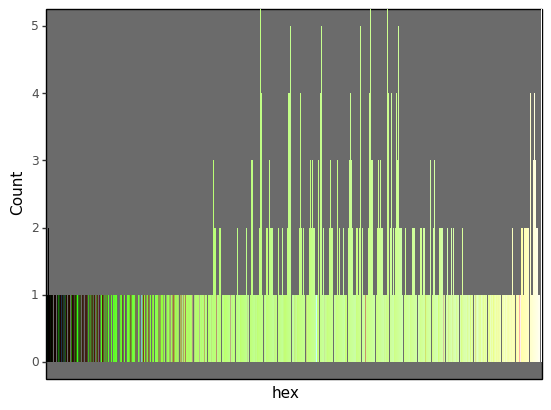

<ggplot: (419492360)>

In [430]:
hist=(ggplot(colours_agg)
      + geom_bar(aes(x='hex',y='Count',fill='hex'),
                stat='identity')
      + scale_fill_manual(values=colours_agg.hex)
      + coord_cartesian(ylim=(0,5))
      + theme(legend_position='none',
             axis_text_x=element_blank(),
             axis_ticks_major_x=element_blank(),
             panel_grid=element_blank(),
             panel_background=element_rect(fill='#6b6b6b'),
             panel_border=element_rect(fill='#000000'))
)
hist

In [432]:
save_as_pdf_pages([hist])

/Users/mac/anaconda/lib/python3.6/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: plotnine-save-419492360.pdf


## Rocketman

In [412]:
rocketman=Image.open('2_2D_spatial_cross_correlation/data/wallypuzzle_rocket_man.png')
rocketman_array=np.asarray(rocketman)

In [413]:
# create dataframe so I can plot the colour frequency
Rrm=rocketman_array[:,:,0][0].astype('int')
Grm=rocketman_array[:,:,1][0].astype('int')
Brm=rocketman_array[:,:,2][0].astype('int')
Count=1
colours_df_rm=pd.DataFrame({'R':Rrm,'G':Grm,'B':Brm,'Count':Count})

In [380]:
# aggregate
colours_agg_rm=colours_df_rm.groupby(['R','G','B'])['Count'].sum().reset_index()

In [394]:
colours_agg_rm

,R,G,B,Count,hex
0,0,0,0,111,#000000


In [382]:
# apply colour conversion function
colours_agg_rm['hex']=colours_agg_rm.apply(rgbToHex, axis =1)

In [385]:
colours_agg_rm

,R,G,B,Count,hex
0,0,0,0,111,#000000


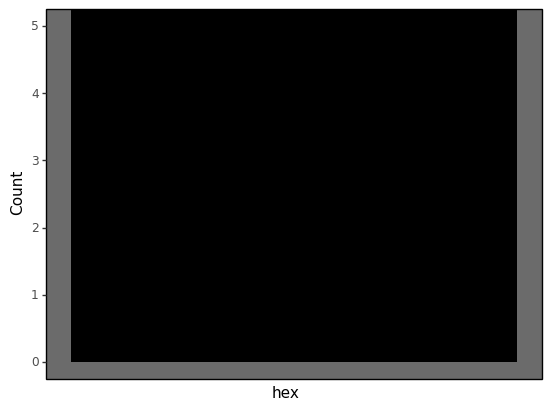

<ggplot: (-9223372029692604472)>

In [384]:
plot=(ggplot(colours_agg_rm)
      + geom_bar(aes(x='hex',y='Count',fill='hex'),
                stat='identity')
      + scale_fill_manual(values=colours_agg.hex)
      + coord_cartesian(ylim=(0,5))
      + theme(legend_position='none',
             axis_text_x=element_blank(),
             axis_ticks_major_x=element_blank(),
             panel_grid=element_blank(),
             panel_background=element_rect(fill='#6b6b6b'),
             panel_border=element_rect(fill='#000000'))
)
plot